In [2]:
# import pandas as pd #data manpulation
# import numpy as np
# import matplotlib.pyplot as plt #data visualization
# import seaborn as sns
# import scipy

# # 1) Cleaning + EDA + Standarization + Encoding 
# import chardet #to detetmine dataset encoding

# #preprocessing: replace numeric and categorical
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelEncoder # label (ordinal or nominal)
# from sklearn.preprocessing import OrdinalEncoder # object (no order)
# from sklearn.preprocessing import OneHotEncoder # categorical 

# # data imbalanced
# from imblearn.datasets import make_imbalance # undersampling
# from sklearn.utils import resample # oversampling
# from imblearn.over_sampling import SMOTE # SMOTE all are numeric
# from imblearn.over_sampling import SMOTENC # smote categorical features

# # 2) Standarize nad change dist of features
# from sklearn.preprocessing import StandardScaler # scaling data so mean = 0 and std =  1 by ((x- u) / std)
# from scipy import stats # for Box-Cox Transformation stats.boxcox(original_data)[0]
# from mlxtend.preprocessing import minmax_scaling # for min_max scaling dont use it
# #or
# from sklearn.preprocessing import MinMaxScaler,normalize  #Tune input range to be 0 -> 1 by MinMaxScaler, same as above


# # 3) feature enginerring
# from sklearn.feature_selection import mutual_info_regression #mutal importance of feature
# from sklearn.feature_selection import RFE, RFECV 
# # a) numeric feature enginering
# from sklearn.cluster import KMeans # Kmeans model for cluster feature
# from scipy.spatial.distance import cdist # for elpow method
# from sklearn.decomposition import PCA # for loadings and adding new feature
# # b) categorical feature enginering
# from category_encoders import MEstimateEncoder # have m estimator


# # 4) Data Modeling = train test split then model then get error
# from sklearn.model_selection import train_test_split, GridSearchCV, KFold, ShuffleSplit #also has cross_val_score (cv)
# from sklearn.model_selection import RepeatedKFold # k fold cross validation it specify cv in corss_val_score dw
# from sklearn.model_selection import cross_val_score # cv to get mean and see how much this feature affect the MAE error
# # ML algorithms
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC, LinearSVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from xgboost import XGBRegressor, XGBClassifier
# # Bagging + Boosting
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier

# # Stacking Regression & CLassification
# from vecstack import stacking # stacking Regression
# from mlxtend.regressor import StackingCVRegressor
# from mlxtend.classifier import StackingCVClassifier # stacking CLassification
# import itertools # to make combo of stacks

# # Evaluation for model
# from sklearn.metrics import *
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# #for accurace of regression use model.score(y_pred, y_test) mean_absolute_error, mean_squared_error

# from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, auc
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import plot_precision_recall_curve
# #for accurace of classification use precision, recall, f1, acc, classification_report, confusion_matrix, roc_curve (tpr, fpr) & roc_auc_score (AUC)

# # you can use (cross_val_score == KFold) (like validation_split=0.1 to get validation_acc) for calssification or regression

# #pipeline
# from sklearn.pipeline import Pipeline, make_pipeline
# from sklearn.compose import ColumnTransformer, make_column_transformer

# # 5) Model summary = features importance and effect + sharp values
# import eli5
# from eli5.sklearn import PermutationImportance # feature importance
# # from pdpbox import pdp, get_dataset, info_plots #for pdp plots
# # import shap  # package used to calculate Shap values
# import time

# # 6) DNN & images & audio visualize
# import tensorflow as tf
# import tensorflow_addons as tfa # to make InstanceNormalization=>(normalize feature axis not like Batch Normalization) for image-to-image models 
# from tensorflow_addons.layers import InstanceNormalization as IN
# import cv2
# import IPython
# from IPython.display import clear_output # to clear output

# cell number [] contains how to save model at some checkpoint also

In [3]:
# import tensorflow_datasets as tfds

# dataset, metadata = tfds.load("cycle_gan/vangogh2photo", with_info=True, as_supervised=True)
# train_Bezdikian, train_photo = dataset["trainA"], dataset["trainB"]
# test_Bezdikian, test_photo = dataset["testA"], dataset["testB"]

In [4]:
# !pip installs

In [5]:
## Colab

# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# # Kaggle
# !pip install pydrive

# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive

# # gauth = GoogleAuth()
# # gauth.LocalWebserverAuth()

# # drive = GoogleDrive(gauth)

# gauth = GoogleAuth(settings_file='/kaggle/input/cyclegan/settings.yaml')
# gauth.DEFAULT_SETTINGS['client_config_file'] = '/kaggle/input/cyclegan/client_secrets.json'
# gauth.DEFAULT_SETTINGS['credentials_file'] = '/kaggle/input/cyclegan/credentials.json'

# gauth.LocalWebserverAuth()

# drive = GoogleDrive(gauth)

In [7]:
def upload_folder_to_folder(from_folder, to_folder):
    # upload folder to drive folder

    for file in os.listdir(from_folder):
        file_path = os.path.join(from_folder, file).replace('\\', '/')
        gfile = drive.CreateFile({'parents': [{'id': to_folder}], 'title':file})
        gfile.SetContentFile(file_path)
        gfile.Upload()
        
# folder_id = '1XsPCiC8Vwl5D_tiGx73cSqk0DnqtRJNA' # CycleGAN folder
# upload_folder_to_folder(from_folder="/kaggle/working/training_checkpoints", to_folder=folder_id)

In [8]:
# def download_folder_files(from_folder, specfic_file = '')
#     # download file/files
    
#     file_list = drive.ListFile({'q': f"'{from_folder}' in parents and trashed=false"}).GetList()
#     for index, file in enumerate(file_list):
#         if (file['title'] == specfic_file) or (len(specfic_file) == 0):
#             print(index+1, 'Downloaded file : ', file['title'])
#             file.GetContentFile(file['title'])
    
# # upword_folder_id = "1TX6HV9-qyoupuyeQlQny0nnt3Mb8SDd0" # upwork dataset
# # download_folder_files(from_folder=upword_folder_id, specfic_file = 'CycleGAN B.rar")

In [9]:
# gdown to download files or rar
!pip install gdown

import gdown

url = 'https://drive.google.com/uc?id='

# https://drive.google.com/file/d/1KLbn5gHWppgDqidr4WhEYMPlsdOD0-Vz/view?usp=share_link
# https://drive.google.com/file/d/1tn-z7DS2BycI5aaXVEntzJEDfRIQA_oe/view?usp=share_link
rar_id = '1tn-z7DS2BycI5aaXVEntzJEDfRIQA_oe'

output = 'CycleGAN Merged.rar'

gdown.download(url + rar_id, output, quiet=False)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1tn-z7DS2BycI5aaXVEntzJEDfRIQA_oe
From (redirected): https://drive.google.com/uc?id=1tn-z7DS2BycI5aaXVEntzJEDfRIQA_oe&confirm=t&uuid=3d4a40e1-70ce-4431-9fdb-bfa1846129fb
To: /kaggle/working/CycleGAN Merged.rar
100%|██████████| 526M/526M [00:03<00:00, 152MB/s]  


'CycleGAN Merged.rar'

In [10]:
from IPython.display import clear_output

# Kaggle
!sudo apt-get install unrar
!unrar x "/kaggle/working/CycleGAN Merged.rar"

# Colab
#  !unrar x "/content/drive/MyDrive/upwork datasets/task 1/CycleGAN B.rar"

clear_output(wait=True)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  unrar
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 113 kB of archives.
After this operation, 406 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 unrar amd64 1:5.6.6-2build1 [113 kB]
Fetched 113 kB in 1s (155 kB/s) 
Selecting previously unselected package unrar.
(Reading database ... 111522 files and directories currently installed.)
Preparing to unpack .../unrar_1%3a5.6.6-2build1_amd64.deb ...
Unpacking unrar (1:5.6.6-2build1) ...
Setting up unrar (1:5.6.6-2build1) ...
update-alternatives: using /usr/bin/unrar-nonfree to provide /usr/bin/unrar (unrar) in auto mode
update-alternatives: warning: skip creation of /usr/share/man/man1/unrar.1.gz because associated file /usr/share/man/man1/unrar-nonfree.1.gz (of link group unrar) doesn't exist
Processing triggers f

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

### Initializing some important values
BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

# path = "/content/drive/MyDrive/upwork datasets/task 1/"
path = ""
path = "/kaggle/working/"


train_Bezdikian = tf.keras.utils.image_dataset_from_directory(path + "CycleGAN Merged/trainA",
                                                             validation_split=None,
                                                             seed=42,
                                                             shuffle=True,
                                                             image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             batch_size=BATCH_SIZE)

train_photo = tf.keras.utils.image_dataset_from_directory(path + "CycleGAN Merged/trainB",
                                                             validation_split=None,
                                                             seed=42,
                                                             shuffle=True,
                                                             image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             batch_size=BATCH_SIZE)

test_Bezdikian = tf.keras.utils.image_dataset_from_directory(path + "CycleGAN Merged/testA",
                                                             validation_split=None,
                                                             seed=42,
                                                             shuffle=True,
                                                             image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             batch_size=BATCH_SIZE)

test_photo = tf.keras.utils.image_dataset_from_directory(path + "CycleGAN Merged/testB",
                                                             validation_split=None,
                                                             seed=42,
                                                             shuffle=True,
                                                             image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             batch_size=BATCH_SIZE)

Found 139 files belonging to 1 classes.
Found 6287 files belonging to 1 classes.
Found 139 files belonging to 1 classes.
Found 751 files belonging to 1 classes.


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

def images_augmentation(train_data, path='content/', augment_each = 5):
    # Define the augmentations you want to apply to the images
#     datagen = ImageDataGenerator(
#         rotation_range=0,
#         width_shift_range=0.05,
#         height_shift_range=0.05,
#         horizontal_flip=True,
#         vertical_flip=False,
#         brightness_range=[0.8, 1.2],
#         fill_mode='reflect'
#     )
    
    datagen = ImageDataGenerator(
        rotation_range=20,  # change the rotation_range to 20 degrees
        width_shift_range=0.2,  # increase the width_shift_range to 0.2
        height_shift_range=0.2,  # increase the height_shift_range to 0.2
        shear_range=0.2,  # add a new parameter shear_range with value 0.2
        zoom_range=[0.2, 0.5],  # change the zoom_range to [0.2, 0.5]
        horizontal_flip=True,  # keep horizontal_flip to True
        vertical_flip=False,  # keep vertical_flip to False
        fill_mode='reflect',  # keep fill_mode to 'reflect'
    )

    # Create a directory to save the augmented images
    augmented_path = path
    if not os.path.exists(augmented_path):
        os.makedirs(augmented_path)

    # Loop through each image in train_data and apply the augmentations
    i = 0
    for image_batch in train_data:
        image = image_batch[0] 
        img_arr = np.array([image])
        img_arr= np.reshape(img_arr, img_arr.shape[2:])
        # Check the shape of img_arr, it should be (256, 256, 3)
        # print(img_arr.shape)
        img_arr = np.expand_dims(img_arr, axis=0)  # Add a batch dimension
        # Check the shape of img_arr, it should be (1, 256, 256, 3)
        # print(img_arr.shape)
        aug_iter = datagen.flow(img_arr, save_to_dir=augmented_path, save_prefix='aug', save_format='jpg')
        # Generate 5 augmented images for each original image
        for _ in range(augment_each):
            aug_image = aug_iter.next()[0].astype('uint8')
            plt.imshow(aug_image)
            plt.show()
            i += 1
            # Stop after generating 7000 augmented images
            if i == 7000:
                break
        clear_output(wait=True)
        # Stop after processing all 31 images
        if i == 7000:
            break
    print(f"Augmented {i} images in CycleGAN Merged/trainA_augmented folder")

In [13]:
# Augment Images
images_augmentation(train_Bezdikian, path=path + 'CycleGAN Merged/trainA_augmented/trainA', augment_each=10)
# try 40 if model not giving good performance yet - if good performance try change augmentation

train_Bezdikian_augmented = tf.keras.utils.image_dataset_from_directory(path + "CycleGAN Merged/trainA_augmented",
                                                             validation_split=None,
                                                             seed=42,
                                                             shuffle=True,
                                                             image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             batch_size=BATCH_SIZE)

Augmented 1390 images in CycleGAN Merged/trainA_augmented folder
Found 1292 files belonging to 1 classes.


In [14]:
# import os

# # Create a directory to save the augmented images
# os.makedirs(path + "dataset/paintings/trainA_augmented", exist_ok=True)

# # Define the image augmentation pipeline
# data_augmentation = tf.keras.Sequential([
#   tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
#   tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
# ])

# # Augment each image in train_van_gogh and save to disk
# for i, image in enumerate(train_van_gogh):
#   # Apply random horizontal flip and rotation to the image
#   augmented_image = data_augmentation(image)

#   # Save the augmented image to disk
#   filename = f"trainA_augmented/image_{i}.jpg"
#   plt.imsave(path + "dataset/paintings/" + filename, np.squeeze(augmented_image.numpy()))

#   # Stop augmenting after generating 10x the number of original images
#   if i >= 31*10-1:
#     break


In [15]:
# # a) Let's Visualize some images
# for data in train_Bezdikian.take(2):
#     images, labels = data[0], data[1]
    
#     _, ax = plt.subplots(4, 4, figsize=(15, 10))

#     for i in range(16): # half number of batch
#         img = np.array(images[i]).astype('uint8')
#         label = labels[i] # will always be 0
        
#         ax[i // 4, i % 4].imshow(img)
#         ax[i // 4, i % 4].set_title('vangogh paint')
#         ax[i // 4, i % 4].axis("off")

# plt.show()

# 1) Preprocessing & Visualizing

In [16]:
### Initializing some important values
BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

### Randomly crop the image

# def random_crop(image):
#     cropped_image = tf.image.random_crop(image, size=[IMG_HEIGHT, IMG_WIDTH, 3])
#     return cropped_image # random crop

def random_crop(image):
    cropped_image = tf.map_fn(lambda img: tf.image.random_crop(img, size=[IMG_HEIGHT, IMG_WIDTH, 3]), image)
    return cropped_image

### Normalize the image
# normalizing the images to [-1, 1]
def normalize(image):
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1 # -1 -> 1
    return image

### Random jitter in the image according to the paper
def random_jitter(image):
    # resizing to 286 x 286 x 3
    image = tf.image.resize(image, [286, 286], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    # randomly cropping to 256 x 256 x 3
    image = random_crop(image)
    # random mirroring
    image = tf.image.random_flip_left_right(image)
    return image

### Preprocessing the image
def preprocess_image_train(image, label):
    image = random_jitter(image)
    image = normalize(image)
    return image

def preprocess_image_test(image, label):
    image = normalize(image)
    return image

In [17]:
AUTOTUNE = tf.data.AUTOTUNE

# # Not Augmented
# train_Bezdikian = train_Bezdikian.cache().map(
#     preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
#     BUFFER_SIZE).batch(BATCH_SIZE)

train_Bezdikian_augmented = train_Bezdikian_augmented.cache().map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

train_photo = train_photo.cache().map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

test_Bezdikian = test_Bezdikian.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

test_photo = test_photo.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

### Visualizing the data

In [18]:
# # Vangoh paintings
# for batch in train_Bezdikian.take(5):
#     for image in batch:
#         plt.figure()
#         plt.imshow(image[0] * 0.5 + 0.5)
#         plt.axis(False)
#         plt.show()

In [19]:
# # Normal paintings
# for batch in train_photo.take(5):
#     for image in batch:
#         plt.figure()
#         plt.imshow(image[0] * 0.5 + 0.5)
#         plt.axis(False)
#         plt.show()

# 2) Building the Model: Generator Architecture

#### 1) Cycle GANs Generator

In [20]:
!pip install tensorflow_addons
import tensorflow_addons as tfa

## Making the functions
def _get_norm_layer(norm):
    if norm == "none":
        return lambda: lambda x: x
    elif norm == "batch_norm":
        return tf.keras.layers.BatchNormalization
    elif norm == "instance_norm":
        return tfa.layers.InstanceNormalization
    elif norm == "layer_norm":
        return tf.keras.layers.LayerNormalization

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
from tensorflow_addons.layers import InstanceNormalization as IN

### Making the resnet block
def _residual_block(x, Norm): # same padding
    dim = x.shape[-1]
    h = x
        
    h = tf.pad(h, [[0, 0], [1, 1], [1, 1], [0, 0]], mode='REFLECT')
    h = keras.layers.Conv2D(dim, 3, padding='valid', use_bias=False)(h) # same padding
    h = Norm()(h)
    h = tf.nn.relu(h)
    h = tf.pad(h, [[0, 0], [1, 1], [1, 1], [0, 0]], mode='REFLECT') #  # to add padding on only width and height!!
    h = keras.layers.Conv2D(dim, 3, padding='valid', use_bias=False)(h) # same padding
    h = Norm()(h)
    return keras.layers.add([x, h])

def ResnetGenerator(input_shape=(256, 256, 3),
                    output_channels=3,
                    dim=64,
                    n_downsamplings=2,
                    n_blocks=9,
                    norm='instance_norm'): # batch_norm, instance_norm
    Norm = _get_norm_layer(norm)
# 0
    h = inputs = keras.Input(shape=input_shape)
# 1
    h = tf.pad(h, [[0, 0], [3, 3], [3, 3], [0, 0]], mode='REFLECT')
    h = keras.layers.Conv2D(dim, 7, padding='valid', use_bias=False)(h)
    h = Norm()(h)
    h = tf.nn.relu(h)
# 2
    for _ in range(n_downsamplings): # Conv->instance_norm->Relu 3 times [downsamping]
        dim *= 2 # number of filters *2 each time [64, 128, 256]
        h = keras.layers.Conv2D(dim, 3, strides=2, padding='same', use_bias=False)(h)
        h = Norm()(h)
        h = tf.nn.relu(h)
# 3
    for _ in range(n_blocks): # [residual blocks skip connections]
        h = _residual_block(h, Norm)
# 4
    for _ in range(n_downsamplings): # [upsamping]
        dim //= 2
        h = keras.layers.Conv2DTranspose(dim, 3, strides=2, padding='same', use_bias=False)(h) # to get image back
        h = Norm()(h)
        h = tf.nn.relu(h)
# 5
    h = tf.pad(h, [[0, 0], [3, 3], [3, 3], [0, 0]], mode='REFLECT')
    h = keras.layers.Conv2D(output_channels, 7, padding='valid')(h) # same padding = tf.pad + conv2D
    h = tf.tanh(h) # result is between -1 and 1
    return keras.Model(inputs=inputs, outputs=h)

#### 2) Cycle GANs Discriminator 

In [22]:
def ConvDiscriminator(input_shape=(256, 256, 3),
                      dim=64,
                      n_downsamplings=3,
                      norm='instance_norm'):
    dim_ = dim
    Norm = _get_norm_layer(norm)
# 0
    h = inputs = keras.Input(shape=input_shape)
# 1
    h = keras.layers.Conv2D(dim, 4, strides=2, padding='same')(h)
    h = tf.nn.leaky_relu(h, alpha=0.2)
    for _ in range(n_downsamplings - 1):
        dim = min(dim * 2, dim_ * 8)
        h = keras.layers.Conv2D(dim, 4, strides=2, padding='same', use_bias=False)(h)
        h = Norm()(h)
        h = tf.nn.leaky_relu(h, alpha=0.2)
# 2
    dim = min(dim * 2, dim_ * 8)
    h = keras.layers.Conv2D(dim, 4, strides=1, padding='same', use_bias=False)(h)
    h = Norm()(h)
    h = tf.nn.leaky_relu(h, alpha=0.2)
# 3
    h = keras.layers.Conv2D(1, 4, strides=1, padding='same')(h)
    return keras.Model(inputs=inputs, outputs=h)

### Initialize the models

In [23]:
## OUTPUT_CHANNELS = 3 ## Hardcoded in the functions
## Building the Resnet Generator as per the cycle gan paper
generator_g = ResnetGenerator()
generator_f = ResnetGenerator()
## Building the Discriminator as per the cycle gan paper
discriminator_x = ConvDiscriminator()
discriminator_y = ConvDiscriminator()

In [24]:
generator_g.count_params()

11383427

In [25]:
generator_f.count_params()

11383427

In [26]:
discriminator_x.count_params()

2765633

In [27]:
discriminator_y.count_params()

2765633

In [28]:
# stop line

### Trying out the generator and the discriminator for the initial generation

In [29]:
## Not Augmented
# sample_Bezdikian = 0
# for batch in train_Bezdikian.take(1):
#     for image in batch[:1]:
#         sample_Bezdikian = image
#         break
#     break

## Augmented
sample_Bezdikian = 0
for batch in train_Bezdikian_augmented.take(1):
    for image in batch[:1]:
        sample_Bezdikian = image
        break
    break

In [30]:
sample_photo = 0
for batch in train_photo.take(1):
    for image in batch[:1]:
        sample_photo = image
        break
    break

#### Visualize output of generator (expected to be noise)

In [31]:
# sample_Bezdikian = np.expand_dims(sample_Bezdikian, axis=0)
# sample_photo = np.expand_dims(sample_photo, axis=0)

# sample_Bezdikian.shape, sample_photo.shape

In [32]:
# to_photo = generator_g(sample_Bezdikian)
# to_van_gogh = generator_f(sample_photo)
# ## Plot the sample 
# plt.figure(figsize = (8, 8))
# contrast = 8
# imgs = [sample_Bezdikian, to_photo, sample_photo, to_van_gogh]
# title = ["Van Gogh", "To Photo", "Photo", "To Van Gogh"]
# for i in range(len(imgs)):
#     plt.subplot(2, 2, i+1)
#     plt.title(title[i])
#     if i % 2 == 0:
#         plt.imshow(imgs[i][0] * 0.5 + 0.5)
#     else:
#         plt.imshow(imgs[i][0] * 0.5 * contrast + 0.5)
# plt.show()

# 3) 4 Losses

* 1) **Discriminator_loss:** (real => 1 & fake => 0) by cross entropy

Explaination: y = 1 at real img so loss = -log (y_hat) of cross entropy so it try to minmize loss so try to make log(y_hat) = 0 so update weights of Discriminator to get -log(y_hat) = 0 so y_hat = 1 as log(1) = 0
(classifer detected real img (y=1) as y_hat (which equals 1 so it's real))

**Note: -log(x) = 0 so log(x) = 0 so x = 1**

y = 0 at fake img so loss = -log(1 - y_hat) of cross entropy so it try to minmize loss so try to make -log(1 - y_hat) = 0 so y_hat = 0 (classifer detected fake img (y=0) as y_hat (which equals 0 so it's fake))

* 2) **Advertisal_loss (generator_loss):**

Explaination: trys to maxmize loss of real img at discrimnator so -log(y_hat) = maxmium so y_hat = 0 whichs makes -log(0) = + infinity

**Note: LAMBDA in next lines hyperparameter determine weight for this loss effect more than generator and descriminator loss**

* 3) **Cycle_loss:**

Explaination: labmbda * abs(real_img - cycled_img)

* 4) **Identity_loss:** 

Explaination: labmbda * 0.5 *abs(real_img - same_img)

0.5 here to decrease impact of identity loss than cycle loss

In [33]:
LAMBDA = 10
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

#
def discriminator_loss(real, generated):
    real_loss = loss_obj(tf.ones_like(real), real) 
    generated_loss = loss_obj(tf.zeros_like(generated), generated)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss * 0.5

def generator_loss(generated):
    return loss_obj(tf.ones_like(generated), generated)

def calc_cycle_loss(real_image, cycled_image):
    loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))
    return LAMBDA * loss1

def identity_loss(real_image, same_image):
    loss = tf.reduce_mean(tf.abs(real_image - same_image))
    return LAMBDA * 0.5 * loss

In [34]:
### Initializing the loss functions:
# Initializing the optimizers

generator_g_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5) # 2e-4
generator_f_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)
discriminator_x_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)

In [35]:
def generate_images(model, test_input):
    prediction = model(test_input)
    plt.figure(figsize=(12, 12))
    display_list = [test_input[0], tf.image.resize(prediction[0], [1024, 1024], method=tf.image.ResizeMethod.BICUBIC)]
    title = ['Input Image', 'Predicted Image']
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        # normalize the pixel values to [0, 1]
        plt.imshow(tf.clip_by_value(display_list[i] * 0.5 + 0.5, 0.0, 1.0))
        plt.axis('off')
    plt.show()


In [36]:
def train_step(real_x, real_y):
    # persistent is set to True because the tape is used more than once to calculate the gradients.
    with tf.GradientTape(persistent=True) as tape:
        # Generator G translates X -> Y
        # Generator F translates Y -> X.
        fake_y = generator_g(real_x, training=True)
        cycled_x = generator_f(fake_y, training=True)
        
        fake_x = generator_f(real_y, training=True)
        cycled_y = generator_g(fake_x, training=True)
        
        # same_x and same_y are used for identity loss.
        same_x = generator_f(real_x, training=True)
        same_y = generator_g(real_y, training=True)
        
        disc_real_x = discriminator_x(real_x, training=True)
        disc_real_y = discriminator_y(real_y, training=True)
        disc_fake_x = discriminator_x(fake_x, training=True)
        disc_fake_y = discriminator_y(fake_y, training=True)
        
        # calculate the loss
        gen_g_loss = generator_loss(disc_fake_y)
        gen_f_loss = generator_loss(disc_fake_x)
        
        total_cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)
        
        # Total generator loss = adversarial loss + cycle loss
        total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)
        total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)
        
        disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
        disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)

        # Print Losses to keep track if Cyclic GAN Model overfitting or not
        print("Generator G Loss:", total_gen_g_loss.numpy(), " Gen loss:", gen_g_loss.numpy(), "Cycle Loss:", total_cycle_loss.numpy(), "Identity Loss:", (total_gen_g_loss - (gen_g_loss + total_cycle_loss)).numpy())
        print("Generator F Loss:", total_gen_f_loss.numpy(), " Gen loss:", gen_f_loss.numpy(), "Cycle Loss:", total_cycle_loss.numpy(), "Identity Loss:", (total_gen_f_loss - (gen_f_loss + total_cycle_loss)).numpy())
        print("Discriminator G Loss:", disc_x_loss.numpy())
        print("Discriminator F Loss:", disc_y_loss.numpy())
        print()
        
    # Calculate the gradients for generator and discriminator
    generator_g_gradients = tape.gradient(total_gen_g_loss, generator_g.trainable_variables)
    generator_f_gradients = tape.gradient(total_gen_f_loss, generator_f.trainable_variables)
    discriminator_x_gradients = tape.gradient(disc_x_loss, discriminator_x.trainable_variables)
    discriminator_y_gradients = tape.gradient(disc_y_loss, discriminator_y.trainable_variables)
    
    # Apply the gradients to the optimizer
    generator_g_optimizer.apply_gradients(zip(generator_g_gradients, generator_g.trainable_variables))
    generator_f_optimizer.apply_gradients(zip(generator_f_gradients, generator_f.trainable_variables))
    discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients, discriminator_x.trainable_variables))
    discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients, discriminator_y.trainable_variables))


In [37]:
# Define a checkpoint object
checkpoint = tf.train.Checkpoint(generator_g_optimizer=generator_g_optimizer,
                                 generator_f_optimizer=generator_f_optimizer,
                                 discriminator_x_optimizer=discriminator_x_optimizer,
                                 discriminator_y_optimizer=discriminator_y_optimizer,
                                 generator_g=generator_g,
                                 generator_f=generator_f,
                                 discriminator_x=discriminator_x,
                                 discriminator_y=discriminator_y)

# Define a checkpoint manager to save and restore checkpoints
checkpoint_dir = "./training_checkpoints"
ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=5)

In [38]:
# Restore the latest checkpoint
ckpt_manager.restore_or_initialize()

# Now the model and optimizer objects have been restored to the state saved in the latest checkpoint.

In [39]:
import os

# create directories to store models and optimizers
model_dir = '/kaggle/working/models/'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

optimizer_dir = '/kaggle/working/optimizers/'
if not os.path.exists(optimizer_dir):
    os.makedirs(optimizer_dir)

In [40]:
# # Load models and optimizers to continue training

# import pickle

# epoch_number = 30
# # Load the generator and discriminator models
# generator_g = keras.models.load_model(f"/kaggle/working/models/generator_g_epoch{epoch_number}.h5")
# generator_f = keras.models.load_model(f"/kaggle/working/models/generator_f_epoch{epoch_number}.h5")
# discriminator_x = keras.models.load_model(f"/kaggle/working/models/discriminator_x_epoch{epoch_number}.h5")
# discriminator_y = keras.models.load_model(f"/kaggle/working/models/discriminator_y_epoch{epoch_number}.h5")

# # Load the optimizer objects
# with open(f"/kaggle/working/optimizers/generator_g_optimizer_epoch{}.pkl", 'rb') as f:
#     generator_g_optimizer = pickle.load(f)
# with open(f"/kaggle/working/optimizers/generator_f_optimizer_epoch{}.pkl", 'rb') as f:
#     generator_f_optimizer = pickle.load(f)
# with open(f"/kaggle/working/optimizers/discriminator_x_optimizer_epoch{}.pkl", 'rb') as f:
#     discriminator_x_optimizer = pickle.load(f)
# with open(f"/kaggle/working/optimizers/discriminator_y_optimizer_epoch{}.pkl", 'rb') as f:
#     discriminator_y_optimizer = pickle.load(f)

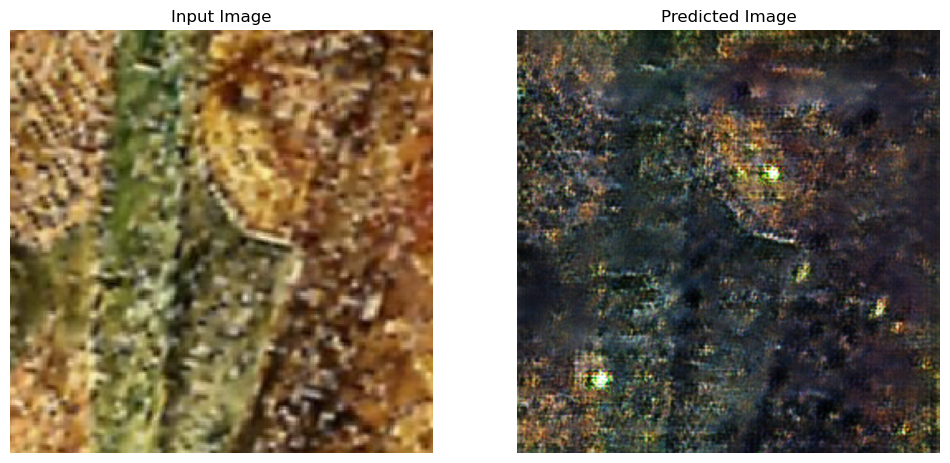

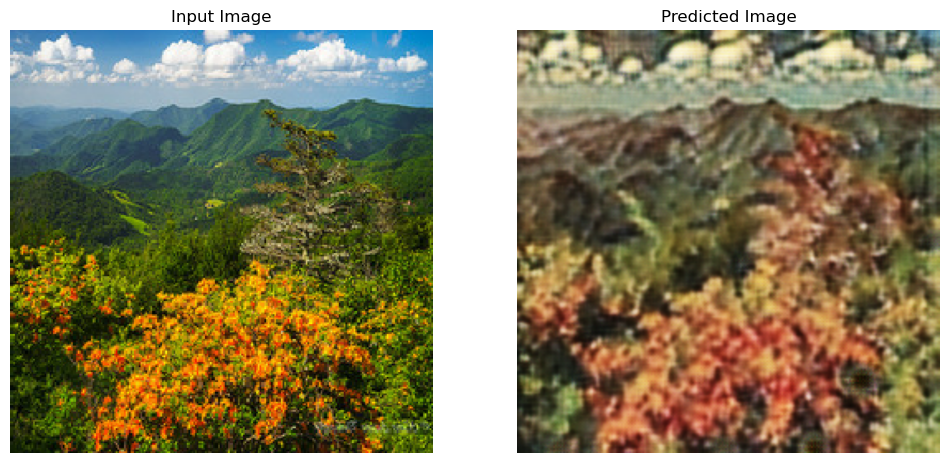

TypeError: can't pickle weakref objects

In [41]:
from IPython.display import clear_output
import pickle

# train_dataset = tf.data.Dataset.zip((train_Bezdikian, train_photo)).shuffle(BUFFER_SIZE) # Not Augmented
train_dataset = tf.data.Dataset.zip((train_Bezdikian_augmented, train_photo)).shuffle(BUFFER_SIZE)

train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE).cache()

EPOCHS = 30
for epoch in range(EPOCHS):
    start = time.time()
    n = 0
    for batch_x, batch_y in train_dataset:
        # Create tf.data.Dataset objects from the tensors
        dataset_x = tf.data.Dataset.from_tensor_slices(batch_x)
        dataset_y = tf.data.Dataset.from_tensor_slices(batch_y)
        # Zip the datasets together to iterate over the individual elements
        dataset = tf.data.Dataset.zip((dataset_x, dataset_y))
        
        for image_x, image_y in dataset:
            train_step(image_x, image_y)
            if n % 10 == 0:
                print ('.', end='')
            n += 1
    clear_output(wait=True)
    
    # Using a consistent image (sample_horse) so that the progress of the model
    # is clearly visible.
    generate_images(generator_g, sample_Bezdikian) # just to show after each epoch the result of the generator !!
    generate_images(generator_f, sample_photo) # just to show after each epoch the result of the generator !!
    
    if (epoch + 1) % 5 == 0:
        # save the models and optimizers after every 5 epochs
        model_g_save_path = model_dir + 'generator_g_epoch{}.h5'.format(epoch+1)
        model_f_save_path = model_dir + 'generator_f_epoch{}.h5'.format(epoch+1)
        discriminator_x_save_path = model_dir + 'discriminator_x_epoch{}.h5'.format(epoch+1)
        discriminator_y_save_path = model_dir + 'discriminator_y_epoch{}.h5'.format(epoch+1)
        generator_g.save(model_g_save_path)
        generator_f.save(model_f_save_path)
        discriminator_x.save(discriminator_x_save_path)
        discriminator_y.save(discriminator_y_save_path)
        
        optimizer_g_save_path = optimizer_dir + 'generator_g_optimizer_epoch{}.pkl'.format(epoch+1)
        optimizer_f_save_path = optimizer_dir + 'generator_f_optimizer_epoch{}.pkl'.format(epoch+1)
        optimizer_x_save_path = optimizer_dir + 'discriminator_x_optimizer_epoch{}.pkl'.format(epoch+1)
        optimizer_y_save_path = optimizer_dir + 'discriminator_y_optimizer_epoch{}.pkl'.format(epoch+1)
        with open(optimizer_g_save_path, 'wb') as f:
            pickle.dump(generator_g_optimizer, f)
        with open(optimizer_f_save_path, 'wb') as f:
            pickle.dump(generator_f_optimizer, f)
        with open(optimizer_x_save_path, 'wb') as f:
            pickle.dump(discriminator_x_optimizer, f)
        with open(optimizer_y_save_path, 'wb') as f:
            pickle.dump(discriminator_y_optimizer, f)
        
        print ('Models and optimizers saved for epoch {}'.format(epoch+1))
#         ckpt_save_path = ckpt_manager.save()
#         print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))
    
    print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1, time.time()-start))

In [ ]:
for inp in test_photo.take(15):
    inp = tf.reshape(inp, [-1, 256, 256, 3])
    generate_images(generator_f, inp) ,

# Save Model

In [ ]:
# save model - 2 approachs

# 1st approach using saveModel (store as graph execution)

# !mkdir -p saved_model
# prediction_model.save('saved_model/my_model')
# new_model = tf.keras.models.load_model('saved_model/my_model')
# # Check its architecture
# new_model.summary()

# 2nd apporach using HDF5 files (store model as object configs):

# # save on drive using Colab
# generator_g.save('content/drive/MyDrive/model/generator_photo.h5')
# generator_f.save('content/drive/MyDrive/model/generator_vangogh.h5')
# discriminator_x.save('content/drive/MyDrive/model/discriminator_photo.h5')
# discriminator_y.save('content/drive/MyDrive/model/discriminator_vangogh.h5')

In [ ]:
# save model - 2 approachs

# 1st approach using saveModel (store as graph execution)

# !mkdir -p saved_model
# prediction_model.save('saved_model/my_model')
# new_model = tf.keras.models.load_model('saved_model/my_model')
# # Check its architecture
# new_model.summary()

# 2nd apporach using HDF5 files (store model as object configs):

# save on local then uplaod on drive (kaggle)
# generator_g.save('/kaggle/working/model/generator_photo.h5')
# generator_f.save('/kaggle/working/model/generator_bezdikan.h5')
# discriminator_x.save('/kaggle/working/model/discriminator_photo.h5')
# discriminator_y.save('/kaggle/working/model/discriminator_vangogh.h5')

In [ ]:
# # upload to drive using Kaggle

# folder_id = '1XsPCiC8Vwl5D_tiGx73cSqk0DnqtRJNA' # CycleGAN folder
# upload_folder_to_folder(from_folder="/kaggle/working/training_checkpoints", to_folder=folder_id)

In [ ]:
stop line

# Load Model

In [ ]:
import tensorflow as tf

generator_f = tf.keras.models.load_model('/kaggle/working/model/generator_bezdikan.h5')
generator_g = tf.keras.models.load_model('/kaggle/working/model/generator_photo.h5')
# Check its architecture
generator_f.summary()

# Test Model

In [ ]:
import os

def preprocess_custom_image(image):
    image = tf.image.resize(image, [256, 256], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return image

def preprocess_custom_image_resize(image):
    image = tf.image.resize(image, [256, 256], method=tf.image.ResizeMethod.BICUBIC)
    return image


def preprocess_and_predict_in_dir(model, dir_name):
    b = 0
    for a in os.listdir(dir_name):
        path = os.getcwd()
        isExist = os.path.exists("results/generated_images")
        if not isExist:
            # Create a new directory because it does not exist
            os.makedirs("results/generated_images")
            print("The new directory is created at results/generated_images!")

        image_to_be_read = dir_name + "/" + a
        print(image_to_be_read)
        img = plt.imread(image_to_be_read)
        original_shape = img.shape[:2]
        preprocessed_image = preprocess_custom_image_resize(img)
        preprocessed_image = tf.cast(preprocessed_image, dtype = tf.float32)
        preprocessed_image = (preprocessed_image/127.5) - 1
        preprocessed_image = preprocessed_image[tf.newaxis, ...]
        prediction = model(preprocessed_image)
        generated_img = keras.preprocessing.image.array_to_img(prediction[0])
        generated_img = generated_img.resize(original_shape)
        generated_img.save(f"./results/generated_images/g{a}.jpg")
        b = b + 1
    print(f"Generated {b} Images in folder \"generated_images\"")

preprocess_and_predict_in_dir(generator_f, 'test_folder')


In [ ]:
stop line

# Transfer Learning

* low lr to not destroy features extracted

* get small dataset and start training

In [ ]:
generator_g_optimizer = tf.keras.optimizers.Adam(2e-5, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(2e-5, beta_1=0.5)
discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-5, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-5, beta_1=0.5)

def train_step_transfer(real_x, real_y):
    # persistent is set to True because the tape is used more than once to calculate the gradients.
    with tf.GradientTape(persistent=True) as tape:
        # Generator G translates X -> Y
        # Generator F translates Y -> X.
        fake_y = generator_g(real_x, training=True)
        cycled_x = generator_f(fake_y, training=True)
        
        fake_x = generator_f(real_y, training=True)
        cycled_y = generator_g(fake_x, training=True)
        
        # same_x and same_y are used for identity loss.
        same_x = generator_f(real_x, training=True)
        same_y = generator_g(real_y, training=True)
        
        disc_real_x = discriminator_x(real_x, training=True)
        disc_real_y = discriminator_y(real_y, training=True)
        disc_fake_x = discriminator_x(fake_x, training=True)
        disc_fake_y = discriminator_y(fake_y, training=True)
        
        # calculate the loss
        gen_g_loss = generator_loss(disc_fake_y)
        gen_f_loss = generator_loss(disc_fake_x)
        
        total_cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)
        
        # Total generator loss = adversarial loss + cycle loss
        total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)
        total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)
        
        disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
        disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)

        # Print Losses to keep track if Cyclic GAN Model overfitting or not
        print("Generator G Loss:", total_gen_g_loss.numpy(), " Gen loss:", gen_g_loss.numpy(), "Cycle Loss:", total_cycle_loss.numpy(), "Identity Loss:", (total_gen_g_loss - (gen_g_loss + total_cycle_loss)).numpy())
        print("Generator F Loss:", total_gen_f_loss.numpy(), " Gen loss:", gen_f_loss.numpy(), "Cycle Loss:", total_cycle_loss.numpy(), "Identity Loss:", (total_gen_f_loss - (gen_f_loss + total_cycle_loss)).numpy())
        print("Discriminator G Loss:", disc_x_loss.numpy())
        print("Discriminator F Loss:", disc_y_loss.numpy())
        print()
        
    # Calculate the gradients for generator and discriminator
    generator_g_gradients = tape.gradient(total_gen_g_loss, generator_g.trainable_variables)
    generator_f_gradients = tape.gradient(total_gen_f_loss, generator_f.trainable_variables)
    discriminator_x_gradients = tape.gradient(disc_x_loss, discriminator_x.trainable_variables)
    discriminator_y_gradients = tape.gradient(disc_y_loss, discriminator_y.trainable_variables)
    
    # Apply the gradients to the optimizer
    generator_g_optimizer.apply_gradients(zip(generator_g_gradients, generator_g.trainable_variables))
    generator_f_optimizer.apply_gradients(zip(generator_f_gradients, generator_f.trainable_variables))
    discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients, discriminator_x.trainable_variables))
    discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients, discriminator_y.trainable_variables))


In [ ]:
!unrar x "/content/drive/MyDrive/upwork datasets/task 1/dataset.rar"
train_gn = tf.keras.utils.image_dataset_from_directory(path + "dataset",
                                                             validation_split=None,
                                                             seed=42,
                                                             shuffle=True,
                                                             image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             batch_size=BATCH_SIZE)

AUTOTUNE = tf.data.AUTOTUNE

train_gn = train_gn.cache().map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
sample_gn = 0
for batch in train_gn.take(1):
    for image in batch[:1]:
        sample_gn = image
        break
    break

# Fine Tunning

In [ ]:
# Transfer Learning
from IPython.display import clear_output

train_dataset = tf.data.Dataset.zip((train_gn, train_photo)).shuffle(BUFFER_SIZE)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE).cache()

EPOCHS = 5
for epoch in range(EPOCHS):
    start = time.time()
    n = 0
    for batch_x, batch_y in train_dataset:
        # Create tf.data.Dataset objects from the tensors
        dataset_x = tf.data.Dataset.from_tensor_slices(batch_x)
        dataset_y = tf.data.Dataset.from_tensor_slices(batch_y)
        # Zip the datasets together to iterate over the individual elements
        dataset = tf.data.Dataset.zip((dataset_x, dataset_y))
        
        for image_x, image_y in dataset:
            train_step_transfer(image_x, image_y)
            if n % 10 == 0:
                print ('.', end='')
            n += 1
    clear_output(wait=True)
    
    # Using a consistent image (sample_horse) so that the progress of the model
    # is clearly visible.
    generate_images(generator_g, sample_gn) # just to show after each epoch the result of the generator !!
    generate_images(generator_f, sample_photo) # just to show after each epoch the result of the generator !!
    
    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))
    
    print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1, time.time()-start))

In [ ]:
for inp in test_photo.take(15):
    inp = tf.reshape(inp, [-1, 256, 256, 3])
    generate_images(generator_f, inp)

## Save Model

In [ ]:
# save model - 2 approachs

# 1st approach using saveModel (store as graph execution)

# !mkdir -p saved_model
# prediction_model.save('saved_model/my_model')
# new_model = tf.keras.models.load_model('saved_model/my_model')
# # Check its architecture
# new_model.summary()

# 2nd apporach using HDF5 files (store model as object configs):
generator_g.save('model/generator_photo.h5')
generator_f.save('model/generator_vangogh.h5')
discriminator_x.save('model/discriminator_photo.h5')
discriminator_y.save('model/discriminator_vangogh.h5')

## Load Model

In [ ]:
generator_f = tf.keras.models.load_model('model/generator_vangogh.h5')
generator_g = tf.keras.models.load_model('model/generator_photo.h5')
# Check its architecture
generator_f.summary()

## Try Your Image

* Just put directory name that contain images

* Results will be in new folder results/generated_images/g{img_name}.jpg

In [ ]:
import os

def preprocess_custom_image(image):
    image = tf.image.resize(image, [256, 256], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return image

def preprocess_custom_image_resize(image):
    image = tf.image.resize(image, [256, 256], method=tf.image.ResizeMethod.BICUBIC)
    return image


def preprocess_and_predict_in_dir(model, dir_name):
    b = 0
    for a in os.listdir(dir_name):
        path = os.getcwd()
        isExist = os.path.exists("results/generated_images")
        if not isExist:
            # Create a new directory because it does not exist
            os.makedirs("results/generated_images")
            print("The new directory is created at results/generated_images!")

        image_to_be_read = dir_name + "/" + a
        print(image_to_be_read)
        img = plt.imread(image_to_be_read)
        original_shape = img.shape[:2]
        preprocessed_image = preprocess_custom_image_resize(img)
        preprocessed_image = tf.cast(preprocessed_image, dtype = tf.float32)
        preprocessed_image = (preprocessed_image/127.5) - 1
        preprocessed_image = preprocessed_image[tf.newaxis, ...]
        prediction = model(preprocessed_image)
        generated_img = keras.preprocessing.image.array_to_img(prediction[0])
        generated_img = generated_img.resize(original_shape)
        generated_img.save(f"./results/generated_images/g{a}.jpg")
        b = b + 1
    print(f"Generated {b} Images in folder \"generated_images\"")

preprocess_and_predict_in_dir(generator_f, 'dataset/paintings')

In [ ]:
!zip -r /content/results/generated_images.zip /content/results/generated_images/

from google.colab import files
files.download("/content/results/generated_images.zip")

In [ ]:
# path = os.getcwd()

# isExist = os.path.exists(path + "results2/generated_images")
# if not isExist:
#   # Create a new directory because it does not exist
#   os.makedirs(path + "results2/generated_images")
#   print("The new directory is created at results/generated_images!")

# isExist = os.path.exists("test_folder")
# if not isExist:
#   print("Please Specify Exsisting Directory")